

## **Ejercicio 1)** Importando librerías

**a)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**b)** Suba el archivo "libreria" `ode.py` que fabricó en el práctico 4), e impórtelo.

# Primera Parte

In [ ]:
import numpy as np
import scipy as sp
import ode
import scipy.linalg as linalg
import matplotlib.pyplot as plt
# from google.colab import files

## **Ejercicio 2)** Dinámica con mecanismo de disparo desactivado

En lo que sigue, se considera desactivado el mecanismo de disparo.

**a)** Resuelva analíticamente la ODE del modelo *Integrate and Fire* para una condición inicial arbitraria $V(0)=V_0$ y una corriente de entrada $I=0$.

**b)** Grafique la solución para $V_0=10mV$ y $t\in [0,100]ms$. Incorpore al gráfico una línea punteada indicando el potencial de reposo.

**c)** Realice un análisis geométrico de la solución calculada. Incorpore flechas del campo vectorial así como los puntos fijos estables, inestables y marginales, si los hubiere.

**d)** Repita **a)**, **b)** y **c)** para el caso de corriente de entrada constante, $I=2$nA.

### Extra

**e)** Resuelva analíticamente la ODE para una corriente de entrada $I:t\to I(t)$ arbitraria.

### **Resulución 2.a):**

Queremos resolver la ecuación diferencial

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
\right)
\end{eqnarray}

con la condición inicial $V(0)=V_{0}$.

La solución general será la suma de las partes homogenea:

\begin{eqnarray}
\frac{dV_{hom}}{dt}
+ \frac{1}{\tau}V_{hom}(t)
&=&
0
\end{eqnarray}

y la particular:

\begin{eqnarray}
\frac{dV_{part}}{dt}
+ \frac{1}{\tau}V_{part}(t)
&=&
\frac{1}{\tau}E
\end{eqnarray}

Para la solución homogenea proponemos una función esponencial:

\begin{eqnarray}
V_{hom}(t)=Ae^{λt}
\end{eqnarray}

Con $λ$ y A constantes a definir. Si derivamos la solución propuesta y la remplzamos en la ecuación homogenea:

\begin{eqnarray}
A\lambda e^{λt}+\frac{1}{\tau}Ae^{λt}
&=&
0
\end{eqnarray}

\begin{eqnarray}
Ae^{λt} (\lambda +\frac{1}{\tau})
&=&
0
\end{eqnarray}

Con lo cual queda definido $λ$:

\begin{eqnarray}
\lambda
&=&
-\frac{1}{\tau}
\end{eqnarray}

Para la solución particular proponemos una función del tipo del lado izquierdo, una constante $V_{part}=cte$, y la reemplazamos en la ecuación diferencial:

\begin{eqnarray}
V_{part}\frac{1}{\tau}
&=&
\frac{1}{\tau}E
\end{eqnarray}

\begin{eqnarray}
V_{part}
&=&
E
\end{eqnarray}

La solución general:

\begin{eqnarray}
V_{general}(t)
&=&
V(t)
&=&
V_{hom}(t) +
V_{part}
\end{eqnarray}

\begin{eqnarray}
V(t)
&=&
Ae^{-\frac{t}{\tau}}
+E
\end{eqnarray}

Para definir la constante $A$ imponemos la condición inicial:

\begin{eqnarray}
V(t=0)
&=&
Ae^{-\frac{0}{\tau}}
+E
&=&
V_{0}
\end{eqnarray}

\begin{eqnarray}
A
&=&
V_{0}-E
\end{eqnarray}

Juntando todos los resultados podemos escribir la solución general:

\begin{eqnarray}
V(t)
&=&
(V_{0}-E)e^{-\frac{t}{\tau}}
+
E
\end{eqnarray}



### Resolución 2.b)

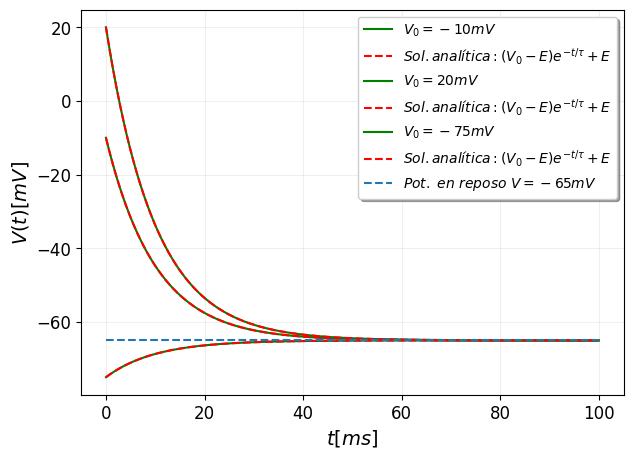

In [ ]:
# 2.b)

def V(t,E,tau,Vo):
  y = (Vo-E)*np.e**(-t/tau)+E
  return y

E   = -65 #mV
Vo  = 10  #mV
tau = 10  #ms

# Resolvemos la ecuación diferencial

k = 1000 #número de pasos
p = 1
t = np.linspace(0,100,k) #ms

def f(Y,t):
    E   = -65  #mV
    Vo  =  10  #mV
    tau =  10  #ms
    resultado = np.array([(1/tau)*(E-Y[0])])    # Sistema de ecuaciones diferenciales con dos ecuaciones de orden uno
    return(resultado)


a   = t[0]                  # Tiempo inicial
b   = t[-1]                  # Tiempo final
h   = (t[-1]-t[0])/k     # Tamaño del paso
p   = 1                  # Constante que acompaña a la función
x_0 = [-65,-45,-75]              # Condición inicial en Tiempo inicial


# Graficamos la solución analítica junto con la numérica

# y_fin,t_fin = ode.integrador_ode_RK4(f,x_0,t[0],t[-1],k,p)


fig, ax = plt.subplots(figsize=(7,5))

for i in x_0:
  # Ploteamos la aproximación
  y_fin,t_fin = ode.integrador_ode_RK4(f,[i],t[0],t[-1],k,p)
  ax.plot(t_fin,y_fin,c='g',label= r'$V_{0}='+str(i)+'mV$')
  # Ploteamos la Solución analítica
  V_fin = V(t,E,tau,i)
  ax.plot(t, V_fin,c='r',linestyle='--', label= r'$Sol. analítica: (V_{0}-E)e^{-t /\tau}+E$')


# ax.plot(t, V_fin,c='r', label= r'$Sol. analítica: (V_{0}-E)e^{-t /\tau}+E$')
# ax.scatter(t_fin,y_fin,s=4.5,c='g',label= r'$Numérica$')
ax.set_xlabel(r'$t[ms]$',fontsize=14)
ax.set_ylabel(r'$V(t)[mV]$',fontsize=14)
# ax.set_title(r'$Voltaje\ vs\ tiempo$')
ax.hlines(E,t[0],t[-1],linestyles='--',label = r'$Pot.\ en\ reposo\ V= '+str(E)+'mV$')
ax.legend(framealpha=1, shadow=True)
ax.grid(alpha=0.2)
ax.tick_params(axis='both',labelsize  = 12)

# plt.savefig(".pdf")
plt.show()

In [ ]:
# help(ax.plot)

### Resolución 2.c)

Para realizar el estudio geométrico analizamos los puntos fijos de la ecuación diferencial:

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
\right)
&=&
f
\left(
V(t)
\right)
\end{eqnarray}

Los ceros de la ecuación son los puntos en los cuales el potencial $V(t)$ no cambia en el tiempo.

\begin{eqnarray}
f
\left(
V_{*}
\right)
&=&
\frac{1}{\tau}
\left(
E-V_{*}
\right)
&=&
0
\end{eqnarray}

Despejando se obtiene que el potencial que es punto fijo:

\begin{eqnarray}
V_{*}
&=&
E
\end{eqnarray}

Para analizar la estabilidad del punto fijo podemos analizar la derivada respecto de V de la función $f(V)$ y evaluarla en el punto fijo para ver el signo y determinar si es un punto atractivo o repulsivo:

\begin{eqnarray}
\frac{df}{dV}(V_{*})
&=&
-\frac{1}{\tau}
&<&
0
\end{eqnarray}

Tenemos entonces que todos los puntos fijos son estables. Quiere dicir que independientemente de las condiciones iniciales del problema, si esperamos tiempos suficientemente largos, la función tenderá al punto fijo.
Geometricamente podemos graficar.


In [ ]:
def f(V,tau,E):
  y = (1/tau)*(E-V)
  return y

tau =  10
E   = -65

V = np.linspace(-75,-55,100)

fig,ax = plt.subplots(figsize=(7,5))

U = f(V,tau,E)

ax.plot(V, U, c = 'r',label = r'$f(V)=-(1/\tau)V+E/\tau$')
ax.scatter(E,0,s=200,c='g',label = r'$Pto. crítico\ V='+str(E)+'mV$')

ax.set_xlabel(r'$V[mV]$',fontsize=14)
ax.set_ylabel(r'$f(v)[mV/ms]$',fontsize=14)

ax.hlines(0,min(V),max(V),colors='k', linestyles='-.')
ax.vlines(E,min(U),max(U),colors='k', linestyles='-.')

ax.tick_params(axis='both',labelsize  = 12)

# (starting_x, starting_y, dx, dy, ...)

p1 = E-5
p2 = E+5

plt.arrow(p1, 0, 5*f(p1,tau,E), 0, head_width=0.1, head_length=0.6, color='blue',shape = 'full')
plt.arrow(p2, 0, 5*f(p2,tau,E), 0, head_width=0.1, head_length=0.6, color='blue',shape = 'full')

ax.legend(framealpha=1,fontsize=12, shadow=True)
plt.grid(alpha=0.2)

# plt.savefig("Punto_A.pdf")
plt.show()

NameError: ignored

In [ ]:
# help(plt.legend)

### **Resolución 2.d) parte 2.a)**

Queremos resolver la ecuación diferencial

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)+IR
\right)
\end{eqnarray}

con la condición inicial $V(0)=V_{0}$.

La solución general será la suma de las partes homogenea:

\begin{eqnarray}
\frac{dV_{hom}}{dt}
+ \frac{1}{\tau}V_{hom}(t)
&=&
0
\end{eqnarray}

y la particular:

\begin{eqnarray}
\frac{dV_{part}}{dt}
+ \frac{1}{\tau}V_{part}(t)
&=&
\frac{1}{\tau}
\left(
E+IR
\right)
\end{eqnarray}

Para la solución homogenea proponemos una función esponencial:

\begin{eqnarray}
V_{hom}(t)=Ae^{λt}
\end{eqnarray}

Con $λ$ y A constantes a definir. Si derivamos la solución propuesta y la remplzamos en la ecuación homogenea:

\begin{eqnarray}
A\lambda e^{λt}+\frac{1}{\tau}Ae^{λt}
&=&
0
\end{eqnarray}

\begin{eqnarray}
Ae^{λt} (\lambda +\frac{1}{\tau})
&=&
0
\end{eqnarray}

Con lo cual queda definido $λ$:

\begin{eqnarray}
\lambda
&=&
-\frac{1}{\tau}
\end{eqnarray}

Para la solución particular proponemos una función del tipo del lado izquierdo, una constante $V_{part}=cte$, y la reemplazamos en la ecuación diferencial:

\begin{eqnarray}
V_{part}\frac{1}{\tau}
&=&
\frac{1}{\tau}
\left(
E+IR
\right)
\end{eqnarray}

\begin{eqnarray}
V_{part}
&=&
E+IR
\end{eqnarray}

La solución general:

\begin{eqnarray}
V_{general}(t)
&=&
V(t)
&=&
V_{hom}(t) +
V_{part}
\end{eqnarray}

\begin{eqnarray}
V(t)
&=&
Ae^{-\frac{t}{\tau}}
+E+IR
\end{eqnarray}

Para definir la constante $A$ imponemos la condición inicial:

\begin{eqnarray}
V(t=0)
&=&
Ae^{-\frac{0}{\tau}}
+E+IR
&=&
V_{0}
\end{eqnarray}

\begin{eqnarray}
A
&=&
V_{0}-E-IR
\end{eqnarray}

Juntando todos los resultados podemos escribir la solución general:

\begin{eqnarray}
V(t)
&=&
(V_{0}-E-IR)e^{-\frac{t}{\tau}}
+
E+IR
\end{eqnarray}


Lo que tendremos para tiempos largos es que el potencial de reposo se despazo $IR$ rspecto al voltaje natural $E$.

### Resolución 2.d) parte b)

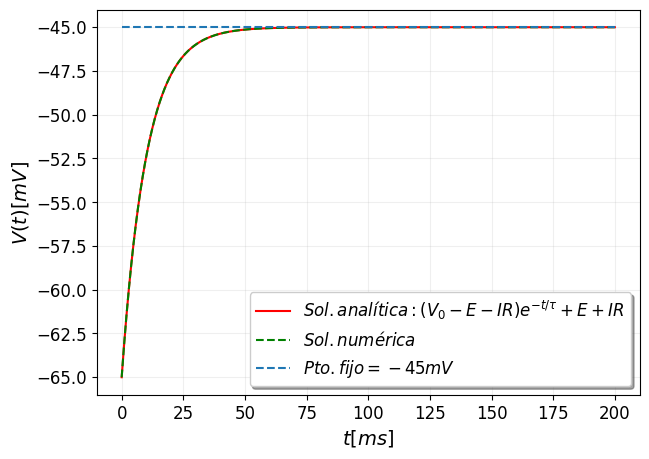

In [ ]:
# 2.d parte b)

def V(t,E,I,R,tau,Vo):
  y = (Vo-E-I*R)*np.e**(-t/tau)+E+I*R
  return y

# Definimos algunas constantes

E   = -65 #mV
Vo  = E  #mV
tau = 10  #ms
R   = 10
I   = 2

# Resolvemos la ecuación diferencial

k = 4000 #número de pasos
p = 1
t = np.linspace(0,200,k) #ms

def f(Y,t):
    E   = -65 #mV
    Vo  = 10  #mV
    tau = 10  #ms
    R   = 10
    I   = 2

    resultado = np.array([(1/tau)*(E-Y[0]+I*R)])    # Sistema de ecuaciones diferenciales con dos ecuaciones de orden uno
    return(resultado)

a   = t[0]                 # Tiempo inicial
b   = t[-1]                # Tiempo final
h   = (t[-1]-t[0])/k       # Tamaño del paso
p   = 1                    # Constante que acompaña a la función
x_0 = [E]                 # Condición inicial en Tiempo inicial

y_fin,t_fin = ode.integrador_ode_RK4(f,x_0,t[0],t[-1],k,p)

# Graficamos la solución analítica junto con la numérica

V_fin = V(t_fin,E,I,R,tau,Vo)

fig, ax = plt.subplots(figsize=(7,5))

ax.plot(t, V_fin,c='r', label= r'$Sol. analítica: (V_{0}-E-IR)e^{-t /\tau}+E+IR$')
ax.plot(t_fin,y_fin[:,0],linestyle='--',c='g',label= r'$Sol.numérica$')
ax.set_xlabel(r'$t[ms]$',fontsize=14)
ax.set_ylabel(r'$V(t)[mV]$',fontsize=14)
# ax.set_title(r'$Voltaje\ vs\ tiempo$')
ax.hlines(E+I*R,t[0],t[-1],linestyles='--',label = r'$Pto.fijo= '+str(E+I*R)+'mV$')
ax.legend(framealpha=1,fontsize=12, shadow=True)
ax.grid(alpha=0.2)
ax.tick_params(axis='both',labelsize  = 12)


# plt.savefig("Punto_D_E.pdf")
plt.show()

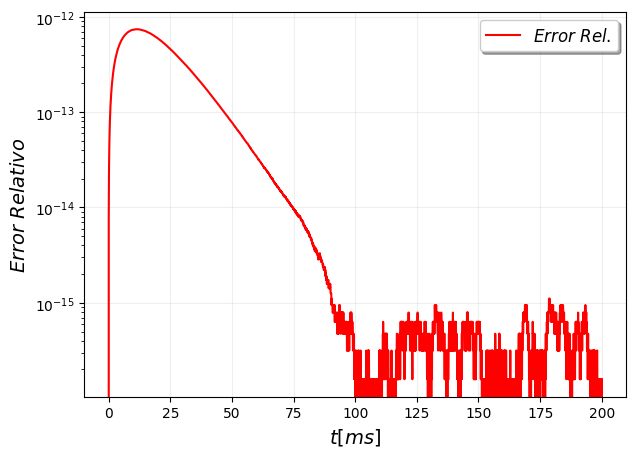

In [ ]:
# Vamos a calcular los errores
error_rel = np.sqrt((V_fin-y_fin[:,0])**2/(V_fin**2))


fig, ax = plt.subplots(figsize=(7,5))

ax.plot(t,error_rel,c='r', label= r'$Error\ Rel.$')
ax.legend(framealpha=1,fontsize=12, shadow=True)
ax.set_xlabel(r'$t[ms]$',fontsize=14)
ax.set_ylabel(r'$Error\ Relativo$',fontsize=14)

plt.yscale("log")

ax.grid(alpha=0.2)
plt.show()

In [ ]:
# V_fin

## A):

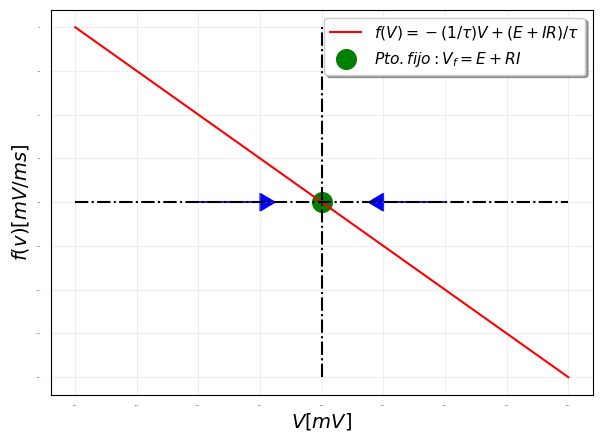

In [ ]:
def f(V,tau,E,I,R):
  y = (1/tau)*(E-V+I*R)
  return y

tau =  10
E   = -65
I   = 0
R   = 10


V = np.linspace(-75,-55,200)

fig,ax = plt.subplots(figsize=(7,5))

U = f(V,tau,E,I,R)

ax.plot(V, U, c = 'r', label = r'$f(V)=-(1/\tau)V+(E+IR)/\tau$')
# ax.scatter(E+I*R,0,s=200,c='g',label = r'$Pto.fijo: V=$'+str(E+I*R)+'$mV$')
ax.scatter(E+I*R,0,s=200,c='g',label = r'$Pto.fijo:V_{f}=E+RI$')


ax.set_xlabel(r'$V[mV]$',fontsize=14)
ax.set_ylabel(r'$f(v)[mV/ms]$',fontsize=14)

ax.hlines(0,min(V),max(V),colors='k', linestyles='-.')
ax.vlines(E+I*R,min(U),max(U),colors='k', linestyles='-.')

ax.tick_params(axis='both',labelsize  = -1,color = 'w')

# (starting_x, starting_y, dx, dy, ...)

p1 = E+I*R-5
p2 = E+I*R+5

plt.arrow(p1, 0, 5*f(p1,tau,E,I,R), 0, head_width=0.1, head_length=0.6, color='blue',shape = 'full')
plt.arrow(p2, 0, 5*f(p2,tau,E,I,R), 0, head_width=0.1, head_length=0.6, color='blue',shape = 'full')

ax.legend(framealpha=1,fontsize=11.2, shadow=True)
plt.grid(alpha=0.2)


# plt.savefig("Mapa_vect.pdf")
plt.show()

quiver para graficar campos vectoriales

### Resolución 2.e)

Veamos ahora que ocurre cuando la corriente que externa que enviamos a la neurona es una función dependiente del tiempo$(V=V(t))$:

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V+RI(t)
\right)
\end{eqnarray}

Despejando las dependencias de la función $V$:

\begin{eqnarray}
\frac{dV}{dt}
+
\frac{1}{τ}V
&=&
\frac{1}{\tau}
\left(
E+RI(t)
\right)
\end{eqnarray}

Utilizando los resultados de del punto 2.d.a) sabemos que la solución del homogeneo es:

\begin{eqnarray}
V_{hom}(t)=Ae^\frac{-t}{τ}
\end{eqnarray}

Para la solución particular, dado que en el miembro derecho de la ecuación diferencial tenemos una función dependiente del tiempo, vamos a proponer una solución de la forma de la sol del homogeneo pero con la constante $A$ ahora como una función dependiente del tiempo $A=A(t)$:

\begin{eqnarray}
V_{part}(t)=A(t)e^\frac{-t}{τ}
\end{eqnarray}

Para calcular la función incógnita $A(t)$ reemplazamos $V_{part}$ en la ecuación diferencial e imponemos que se cumpla la relación:

\begin{eqnarray}
\frac{dV_{part}}{dt}
+
\frac{1}{τ}V_{part}
&=&
\frac{1}{\tau}
\left(
E+RI(t)
\right)
\end{eqnarray}

\begin{eqnarray}
\left(
\frac{dA}{dt}e^{\frac{-t}{τ}}
-
\frac{A}{τ}e^{\frac{-t}{τ}}
\right)
+
\frac{A}{τ}e^{\frac{-t}{τ}}
&=&
\frac{1}{\tau}
\left(
E+RI(t)
\right)
\end{eqnarray}

Despejando llegamos a la ecuación:

\begin{eqnarray}
\frac{dA}{dt}
&=&
\frac{1}{\tau}
\left(
E+RI(t)
\right)e^{\frac{t}{τ}}
\end{eqnarray}

\begin{eqnarray}
\frac{dA}{dt}
&=&
\frac{1}{\tau}
\left(
E+RI(t)
\right)e^{\frac{t}{τ}}
\end{eqnarray}

\begin{eqnarray}
\frac{dA}{dt}
&=&
\frac{E}{\tau}e^{\frac{t}{τ}}
+
\frac{R}{\tau}I(t)e^{\frac{t}{τ}}
\end{eqnarray}

Teniendo sólo dependencia temporal podemos integrar miembro a miembro:


\begin{eqnarray}
\int_{A_{0}}^{A(t)} dA
=
\frac{E}{\tau}
\int_{t_{0}}^{t} e^{\frac{t}{τ}} dt
+
\frac{R}{\tau}
\int_{t_{0}}^{t} I(t)e^{\frac{t}{τ}} dt
\end{eqnarray}

Resolviendo las integrales llegamos a que la función $A(t)$, dependiendo de la función $I(t)$, es:

\begin{eqnarray}
A(t)
=
A_{0}
+
E\left(
e^{\frac{t}{τ}}
-
e^{\frac{t_{0}}{τ}}
\right)
+
\frac{R}{\tau}
\int_{t_{0}}^{t} I(t)e^{\frac{t}{τ}} dt
\end{eqnarray}

Con lo cual la solución particular es simplemente multiplicar $A(t)$ por la exponencial $e^{\frac{-t}{τ}}$:

\begin{eqnarray}
V_{part}(t)
=
A_{0}e^{\frac{-t}{τ}}
+
E\left(
1
-
e^{\frac{t_{0}-t}{τ}}
\right)
+
\frac{R}{\tau}e^{\frac{-t}{τ}}
\int_{t_{0}}^{t} I(t)e^{\frac{t}{τ}} dt
\end{eqnarray}

Calculando la solución general, la suma de la homogenea y la particular, y $t_{0}=0$:

\begin{eqnarray}
V_{Gen}(t)
=
Ce^{\frac{-t}{τ}}
+
E\left(
1
-
e^{\frac{-t}{τ}}
\right)
+
\frac{R}{\tau}e^{\frac{-t}{τ}}
\int_{0}^{t} I(t)e^{\frac{t}{τ}} dt
\end{eqnarray}

con la constante $C$ a determinar con las condiciones iniciales. Sabemos que a $V(t_{0}=0)=V_{0}$, imponiendo en la solución hallada:




Si imponemos una corriente $I=cte$ vemos que recuperamos la solución del punto anterior, y cuando $t→∞$ vemos que $V→E+IR$.


## **Ejercicio 3)** Dinámica con mecanismo de disparo activado

**a)** Resuelva numéricamente la ODE del modelo *Integrate and Fire* en el intervalo $t\in [0,200]ms$ para la condición inicial $V(0)=E$ y una corriente de entrada $I(t)=I_0$ para todo $t$ con $I_0=2nA$. Utilice el paso de integración $h=0.05ms$.

**b)** Grafique la solución computada en el inciso **3.a)**. Incorpore al gráfico la solución exacta del inciso **2.a)**, en donde el mecanismo de disparo está desactivado, para la misma condición inicial del inciso **3.a)**. Grafique, también, líneas punteadas horizontales marcando los valores de $V^*$ y $V_u$.

**c)** Para el caso indicado en el inciso **3.a)**, calcule analíticamente el período de disparo.
Observe si el valor computado corresponde con el observado en el inciso **3.b)**.
Grafíque la frencuencia en función de $I_0$.
Que ocurre para valores pequeños de $I_0$?


**d)** Repita **3.a)** y **3.b)** con $I_e(t)=I_0 \cos(t/30ms)$ e $I_0=2.5nA$ para $0\,ms\leq t\leq 500\,ms$. En este caso, no incluya la solución exacta del inciso **2.a)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

**e)** Repita **3.a)** y **3.b)** con

\begin{equation}
I(t)= I_0 \, \left(
    \cos{\left( \frac{t}{3ms} \right)} +
    \sin{\left( \frac{t}{5ms} \right)} +
    \cos{\left( \frac{t}{7ms} \right)} +
    \sin{\left( \frac{t}{11ms} \right)} +
    \cos{\left( \frac{t}{13ms} \right)}  \right)^2 \, nA \,
    \;\;\;(4)
\end{equation}

e $I_0=0.35 nA$ para $0\,ms\leq t\leq 200\,ms$. Al igual que en inciso anterior, no incluya la solución exacta del inciso **2.a)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

--------------------------------------------------
Ecuación diferencial

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)+IR
\right)
\end{eqnarray}



Solución analítoca para I=cte
\begin{eqnarray}
V(t)
&=&
(V_{0}-E-IR)e^{-\frac{t}{\tau}}
+
E+IR
\end{eqnarray}

### Resolución 3.a) y 3.b)

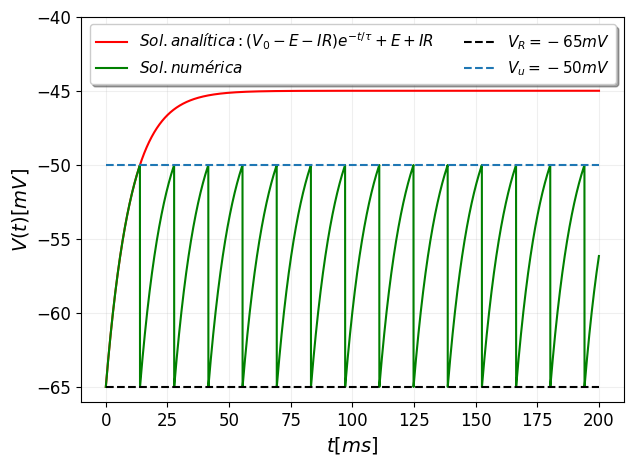

In [ ]:
# 3.a.b)

def V(t,E,I,R,tau,Vo):
  y = (Vo-E-I*R)*np.e**(-t/tau)+E+I*R
  return y

# Definimos algunas constantes

E   = -65 #mV
Vo  = E  #mV
tau = 10  #ms
R   = 10
I   = 2

# Resolvemos la ecuación diferencial

k = 6000 #número de pasos
p = 1
t = np.linspace(0,200,k) #ms

def f(Y,t):
    E   = -65 #mV
    Vo  = E  #mV
    tau = 10  #ms
    R   = 10
    I   = 2

    resultado = np.array([(1/tau)*(E-Y[0]+I*R)])    # Sistema de ecuaciones diferenciales con dos ecuaciones de orden uno
    return(resultado)

a   = t[0]               # Tiempo inicial
b   = t[-1]              # Tiempo final
h   = (t[-1]-t[0])/k     # Tamaño del paso
p   = 1                  # Constante que acompaña a la función
x_0 = [E]              # Condición inicial en Tiempo inicial

# y_fin,t_fin = ode.integrador_ode_RK4(f,x_0,t[0],t[-1],k,p)

Vu = -50 #Pot umbral
y_fin,t_fin = ode.integrador_ode_IandF(f,x_0,E,Vu,t[0],t[-1],k,p)


# Graficamos la solución analítica junto con la numérica

V_fin = V(t,E,I,R,tau,Vo)

fig, ax = plt.subplots(figsize=(7,5))

ax.plot(t, V_fin,c='r', label=r'$Sol.analítica:(V_{0}-E-IR)e^{-t /\tau}+E+IR$')
ax.plot(t_fin,y_fin,c='g',label=r'$Sol.numérica$')
ax.set_xlabel(r'$t[ms]$',fontsize=14)
ax.set_ylabel(r'$V(t)[mV]$',fontsize=14)

plt.ylim(top=-40)
ax.tick_params(axis='both',labelsize  = 12)

# ax.set_title(r'$Voltaje\ vs\ Tiempo$')
ax.hlines(E,t[0],t[-1],linestyles='--',colors='k',label = r'$V_{R}= '+str(E)+'mV$')
ax.hlines(Vu,t[0],t[-1],linestyles='--',label = r'$V_{u}= '+str(Vu)+'mV$')
ax.legend(framealpha=1, shadow=True,loc = 'upper right',fontsize = 11,ncols =2)
ax.grid(alpha=0.2)


# plt.savefig("Punto_F.pdf")
plt.show()

###  Resolución 3.c)

La solución analítica para una corriente $I=cte$ encontramos que tiene la forma:

\begin{eqnarray}
V(t)
&=&
(V_{0}-E-IR)e^{-\frac{t}{\tau}}
+
E+IR
\end{eqnarray}

El mecanismo de disparo ocurrirá cuando el potencial $V(t_{u})=V_{u}$, con lo cual:

\begin{eqnarray}
V(t_{u})
&=&
(V_{0}-E-IR)e^{-\frac{t_{u}}{\tau}}
+
E+IR
&=&
V_{u}
\end{eqnarray}

Despejando $t_{u}$ se obtiene el período de disparo:

\begin{eqnarray}
t_{u}
&=&
\tau ln
\left(
  \frac{V_{0}-E-IR}{V_{u}-E-IR}
\right)
\end{eqnarray}

Lo que nos impone condiciones para la existenca de períodos de disparo. Se deben cumplir:

\begin{eqnarray}
I
&<&
\frac{V_{0}-E}{R},
I
&<&
\frac{V_{u}-E}{R}
\end{eqnarray}
Ó:
\begin{eqnarray}
I
&>&
\frac{V_{0}-E}{R},
I
&>&
\frac{V_{u}-E}{R}
\end{eqnarray}

Más aún, lo que nos interesa son las soluciones positivas del periodo. Entonces buscamos las condiciones en las cuales el argumento del logaritmo $ln(x)>0,x>1$:

\begin{eqnarray}
V_{0}
&>&
V_{u},
I
&<&
\frac{V_{u}-E}{R}
\end{eqnarray}
Ó:
\begin{eqnarray}
V_{0}
&<&
V_{u},
I
&>&
\frac{V_{u}-E}{R}
\end{eqnarray}

Como siempre se cumple que $V_{0}<V_{u}$, la condición para la corriente queda definida por:

\begin{eqnarray}
I
&>&
\frac{V_{u}-E}{R}
\end{eqnarray}

Para encontrar los máximos en el array utilizamos la función np.where con la condición de que el voltaje sea igual la potencial del umbral:

Frecuencia de disparo[numéricamente] : 0.07211538461538461
Frecuencia de disparo[analíticamente] : 0.07213475204444816
Cota para la corriente>: 1.5


<ipython-input-5-c27f1b8f6259>:17: RuntimeWarning: divide by zero encountered in log
  y = tau*np.log((Vo-E-I*R)/(Vu-E-I*R))
<ipython-input-5-c27f1b8f6259>:17: RuntimeWarning: invalid value encountered in log
  y = tau*np.log((Vo-E-I*R)/(Vu-E-I*R))


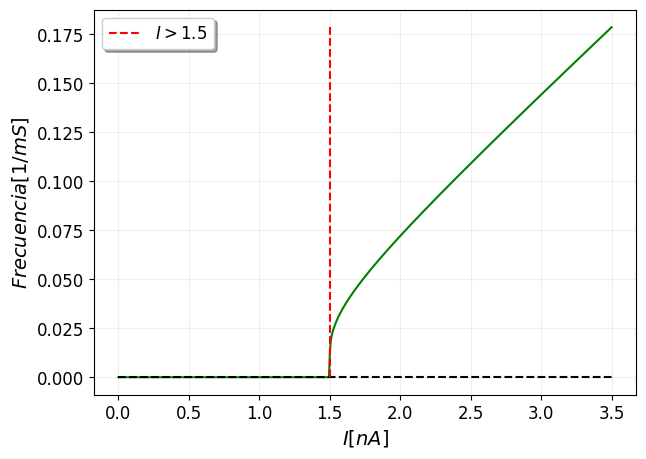

In [ ]:
# 3.c)
lugar_max =  np.where(y_fin[:,0] == max(y_fin[:,0]))[0]
periodo = []
for i in range(len(lugar_max)-1):
  periodo.append(t_fin[lugar_max[i+1]]-t_fin[lugar_max[i]])

print('Frecuencia de disparo[numéricamente] :',1/(sum(periodo)/len(periodo)))
print('Frecuencia de disparo[analíticamente] :',1/(tau*np.log((Vo-E-I*R)/(Vu-E-I*R))))
print('Cota para la corriente>:',(Vu-E)/R)

def Periodo(I):
  E   = -65 #mV
  Vo  = E  #mV
  tau = 10  #ms
  R   = 10
  Vu  = -50
  y = tau*np.log((Vo-E-I*R)/(Vu-E-I*R))
  return y

# corriente = np.linspace(1.00001*(Vu-E)/R,5,50)
corriente = np.linspace(0*(Vu-E)/R,3.5,500)

Tau  = Periodo(corriente)
Frec = 1/Tau

Frec[np.isnan(Frec)] = 0

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.plot(corriente,Frec,c='g')
ax.set_xlabel(r'$I[nA]$',fontsize=14)
ax.set_ylabel(r'$Frecuencia[1/mS]$',fontsize=14)
# ax[0].set_title(r'$Frecuencia\ vs\ Corriente$')
ax.hlines(0,corriente[0],corriente[-1],linestyles='--',color='k')
ax.vlines((Vu-E)/R,0,max(Frec),linestyles='--',color='r', label=r'$I>$'+str((Vu-E)/R))
ax.legend(framealpha=1, shadow=True,loc = 'upper left',fontsize = 12)
ax.grid(alpha=0.2)
ax.tick_params(axis='both',labelsize  = 12)


# ax[1].scatter(corriente,Tau,s=20,c='g',label=r'$Numérica$')
# ax[1].set_xlabel(r'$I[nA]$',fontsize=14)
# ax[1].set_ylabel(r'$Periodo[mS]$',fontsize=14)
# # ax[1].set_title(r'$Periodo\ vs\ Corriente$')
# ax[1].hlines(0,corriente[0],corriente[-1],linestyles='--',color='k')
# ax[1].vlines((Vu-E)/R,0,max(Tau),linestyles='--',color='r')
# # ax[1].legend(framealpha=1, shadow=True)
# ax[1].grid(alpha=0.2)
# ax[1].tick_params(axis='both',labelsize  = 12)



# plt.savefig("Punto_G.pdf")
plt.show()

Lo que vemos es que cuando la corriente tiende a cero, el período de disparo tiende a más infinito.

### Resolución 3.d)

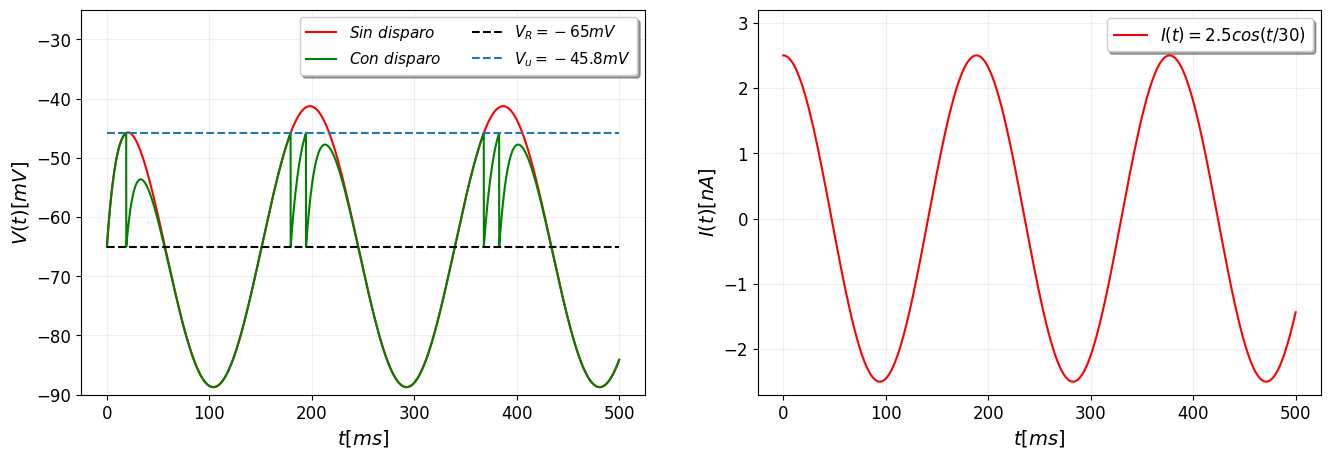

In [ ]:
# 3.d)

# Definimos algunas constantes

E    = -65 #mV
Vo   = E  #mV
tau  = 10  #ms
R    = 10
Io   = 2.5
omega= 30
C = Vo-((R*Io*omega**2)/(tau**2+omega**2))

def V(t,E,Io,R,tau,Vo,omega):
  C = Vo-((R*Io*omega**2)/(tau**2+omega**2))
  y = C*np.e**(-t/tau)+E*(1-np.e**(-t/tau))+((R*Io*omega)/(tau**2+omega**2))*(tau*np.sin(t/omega)+omega*np.cos(t/omega))
  return y

# Resolvemos la ecuación diferencial

k = 6000 #número de pasos
p = 1
t = np.linspace(0,500,k) #ms

def f(Y,t):
    E   = -65 #mV
    Vo  = E  #mV
    tau = 10  #ms
    R   = 10
    Io   = 2.5
    omega= 30

    resultado = np.array([(1/tau)*(E-Y[0]+Io*R*np.cos(Y[1]/omega)),1])    # Sistema de ecuaciones diferenciales con dos ecuaciones de orden uno
    return(resultado)

a   = t[0]               # Tiempo inicial
b   = t[-1]              # Tiempo final
h   = (t[-1]-t[0])/k     # Tamaño del paso
p   = 1                  # Constante que acompaña a la función
x_0 = [E,0]              # Condición inicial en Tiempo inicial

# y_fin,t_fin = ode.integrador_ode_RK4(f,x_0,t[0],t[-1],k,p)

V_u = -45.8 #Pot umbral
y_fin,t_fin   = ode.integrador_ode_IandF(f,x_0,E,V_u,t[0],t[-1],k,p)
y_fin2,t_fin2 = ode.integrador_ode_RK4(f,x_0,t[0],t[-1],k,p)

# Graficamos la solución analítica junto con la numérica

V_fin = V(t,E,Io,R,tau,Vo,omega)

fig, ax = plt.subplots(1,2,figsize=(16,5))

# ax[0].plot(t, V_fin,c='r', label=r'$Sin\ disparo$')
ax[0].plot(t_fin2, y_fin2[:,0],c='r', label=r'$Sin\ disparo$')
ax[0].plot(t_fin,y_fin[:,0],c='g',label=r'$Con\ disparo$')
ax[0].set_xlabel(r'$t[ms]$',fontsize=14)
ax[0].set_ylabel(r'$V(t)[mV]$',fontsize=14)
# ax[0].set_title(r'$Voltaje\ vs\ Tiempo$')
ax[0].hlines(E,t[0],t[-1],linestyles='--',colors='k',label = r'$V_{R}= '+str(E)+'mV$')
ax[0].hlines(V_u,t[0],t[-1],linestyles='--',label = r'$V_{u} = '+str(V_u)+'mV$')
# ax[0].legend(framealpha=0.5, shadow=True)
ax[0].grid(alpha=0.2)
ax[0].tick_params(axis='both',labelsize  = 12)
ax[0].legend(framealpha=1, shadow=True,loc = 'upper right',fontsize = 11,ncols=2)
ax[0].set_ylim((-90,-25))

# Graficamos la corriente de entrada
ax[1].plot(t, Io*np.cos(t/omega),c='r', label=r'$I(t)=2.5cos(t/30)$')
# ax[1].scatter(t_fin,y_fin[:,0],s=1.9,c='g',label='$Numérica$')
ax[1].set_xlabel(r'$t[ms]$',fontsize=14)
ax[1].set_ylabel(r'$I(t)[nA]$',fontsize=14)
# ax[1].set_title(r'$Corriente\ vs\ Tiempo$')
# ax[1].hlines(E,t[0],t[-1],linestyles='--',colors='r',label = 'Pot. en reposo= '+str(E))
# ax[1].hlines(V_u,t[0],t[-1],linestyles='--',label = 'Pot. en umbral $V_{u}$= '+str(V_u))
# ax[1].legend(framealpha=0.5, shadow=True)
ax[1].grid(alpha=0.2)
ax[1].tick_params(axis='both',labelsize  = 12)
ax[1].legend(framealpha=1, shadow=True,loc = 'upper right',fontsize = 12)
ax[1].set_ylim((min(Io*np.cos(t/omega))-0.2,3.2))



# plt.savefig("Punto_H.pdf")
plt.show()

In [ ]:
# help(ax[0].set_ylim())

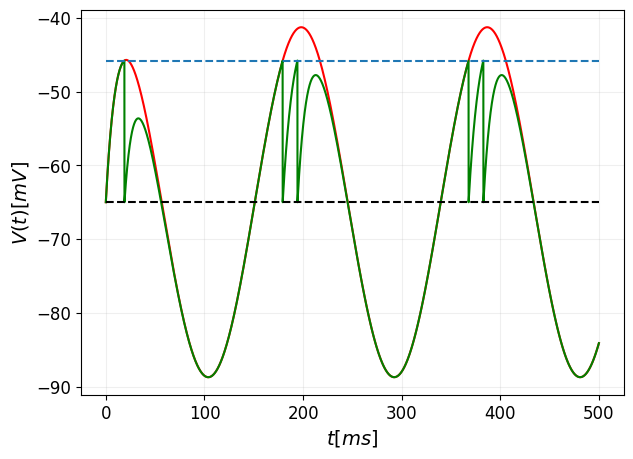

In [ ]:
# Intento plotear el voltage y la corriente en un mismo gráfico

# 3.d)

# Definimos algunas constantes

E    = -65 #mV
Vo   = E  #mV
tau  = 10  #ms
R    = 10
Io   = 2.5
omega= 30
C = Vo-((R*Io*omega**2)/(tau**2+omega**2))

def V(t,E,Io,R,tau,Vo,omega):
  C = Vo-((R*Io*omega**2)/(tau**2+omega**2))
  y = C*np.e**(-t/tau)+E*(1-np.e**(-t/tau))+((R*Io*omega)/(tau**2+omega**2))*(tau*np.sin(t/omega)+omega*np.cos(t/omega))
  return y

# Resolvemos la ecuación diferencial

k = 6000 #número de pasos
p = 1
t = np.linspace(0,500,k) #ms

def f(Y,t):
    E   = -65 #mV
    Vo  = E  #mV
    tau = 10  #ms
    R   = 10
    Io   = 2.5
    omega= 30

    resultado = np.array([(1/tau)*(E-Y[0]+Io*R*np.cos(Y[1]/omega)),1])    # Sistema de ecuaciones diferenciales con dos ecuaciones de orden uno
    return(resultado)

a   = t[0]               # Tiempo inicial
b   = t[-1]              # Tiempo final
h   = (t[-1]-t[0])/k     # Tamaño del paso
p   = 1                  # Constante que acompaña a la función
x_0 = [E,0]              # Condición inicial en Tiempo inicial

# y_fin,t_fin = ode.integrador_ode_RK4(f,x_0,t[0],t[-1],k,p)

V_u = -45.8 #Pot umbral
y_fin,t_fin = ode.integrador_ode_IandF(f,x_0,E,V_u,t[0],t[-1],k,p)
y_fin2,t_fin2 = ode.integrador_ode_RK4(f,x_0,t[0],t[-1],k,p)

# Graficamos la solución analítica junto con la numérica

V_fin = V(t,E,Io,R,tau,Vo,omega)

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.plot(t_fin2, y_fin2[:,0],c='r', label=r'$Sin disparo$')
ax.plot(t_fin,y_fin[:,0],c='g',label=r'$Con disparo$')
ax.set_xlabel(r'$t[ms]$',fontsize=14)
ax.set_ylabel(r'$V(t)[mV]$',fontsize=14)
# ax[0].set_title(r'$Voltaje\ vs\ Tiempo$')
ax.hlines(E,t[0],t[-1],linestyles='--',colors='k',label = r'Pot.\ en\ reposo= '+str(E)+'mV$')
ax.hlines(V_u,t[0],t[-1],linestyles='--',label = r'$Pot.\ en\ umbral\ V_{u}= '+str(V_u)+'mV$')
# ax[0].legend(framealpha=0.5, shadow=True)
ax.grid(alpha=0.2)
ax.tick_params(axis='both',labelsize  = 12)


# ax2=ax.twinx()
# # make a plot with different y-axis using second axis object
# ax2.plot(t, Io*np.cos(t/omega),c='c')
# ax2.set_ylabel(r"$I(t)[nA]$",fontsize=14)


### Resolución 3.e)

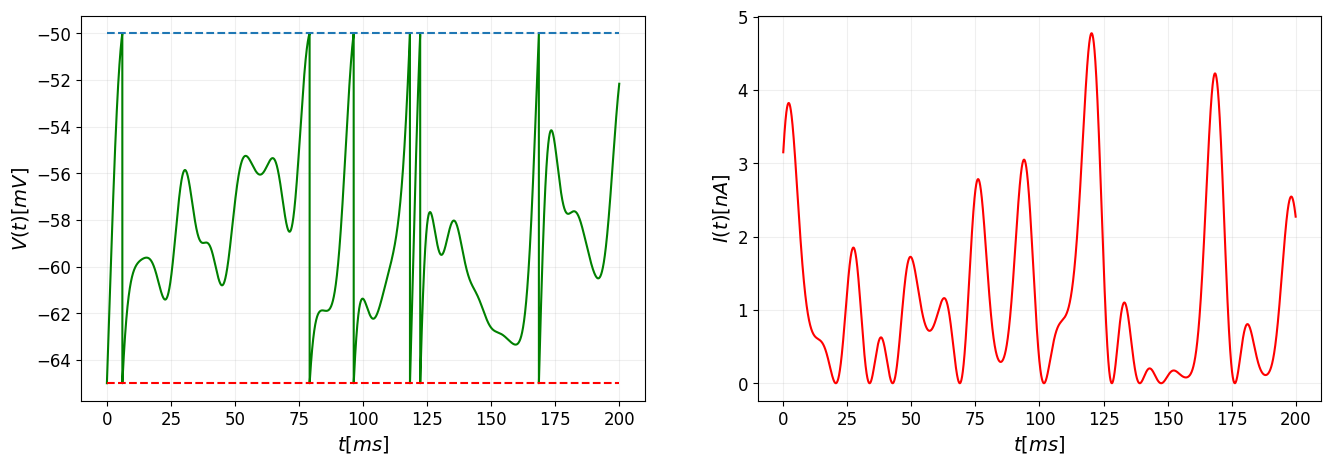

In [ ]:
# 3.e)

# Definimos algunas constantes

E   = -65 #mV
Vo  = E  #mV
tau = 10  #ms
R   = 10
Io   = 0.35

# Resolvemos la ecuación diferencial

k = 10000 #número de pasos
p = 1
t = np.linspace(0,200,k) #ms

def f(Y,t):
    E   = -65 #mV
    Vo  = E   #mV
    tau = 10  #ms
    R   = 10
    Io   = 0.35
    # Sistema de ecuaciones diferenciales, dos ecuaciones de orden uno.
    resultado = np.array([(1/tau)*(E-Y[0]+Io*R*(np.cos(Y[1]/3)+np.sin(Y[1]/5)+np.cos(Y[1]/7)+np.sin(Y[1]/11)+np.cos(Y[1]/13))**2),1])
    return(resultado)

a   = t[0]               # Tiempo inicial
b   = t[-1]              # Tiempo final
h   = (t[-1]-t[0])/k     # Tamaño del paso
p   = 1                  # Constante que acompaña a la función
x_0 = [E,0]              # Condición inicial en Tiempo inicial

# Integramos numéricamente el sistema de ecuaciones.

V_u = -50 #Pot. umbral
y_fin,t_fin = ode.integrador_ode_IandF(f,x_0,E,V_u,t[0],t[-1],k,p)

fig, ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(t_fin,y_fin[:,0],c='g',label=r'$Numérica$')
ax[0].set_xlabel(r'$t[ms]$',fontsize=14)
ax[0].set_ylabel(r'$V(t)[mV]$',fontsize=14)
# ax[0].set_title(r'$Voltaje\ vs\ Tiempo$')
ax[0].hlines(E,t[0],t[-1],linestyles='--',colors='r',label = r'$Pot.\ en\ reposo= '+str(E)+'mV$')
ax[0].hlines(V_u,t[0],t[-1],linestyles='--',label = r'$Pot.\ en\ umbral\ V_{u}= '+str(V_u)+'mV$')
# ax.legend(framealpha=0.5, shadow=True)
ax[0].grid(alpha=0.2)
ax[0].tick_params(axis='both',labelsize  = 12)


# Graficamos la corriente de entrada
ax[1].plot(t, Io*(np.cos(t/3)+np.sin(t/5)+np.cos(t/7)+np.sin(t/11)+np.cos(t/13))**2,c='r', label=r'$Sol.\ analítica\ de: (V_{0}-E-IR)e^{-t /\\tau}+E+IR$')
# ax[1].scatter(t_fin,y_fin[:,0],s=1.9,c='g',label='$Numérica$')
ax[1].set_xlabel(r'$t[ms]$',fontsize=14)
ax[1].set_ylabel(r'$I(t)[nA]$',fontsize=14)
# ax[1].set_title(r'$Corriente\ vs\ Tiempo$')
# ax[1].hlines(E,t[0],t[-1],linestyles='--',colors='r',label = 'Pot. en reposo= '+str(E))
# ax[1].hlines(V_u,t[0],t[-1],linestyles='--',label = 'Pot. en umbral $V_{u}$= '+str(V_u))
# ax[1].legend(framealpha=0.5, shadow=True)
ax[1].grid(alpha=0.2)
ax[1].tick_params(axis='both',labelsize  = 12)


# plt.savefig("Punto_I.pdf")
plt.show()

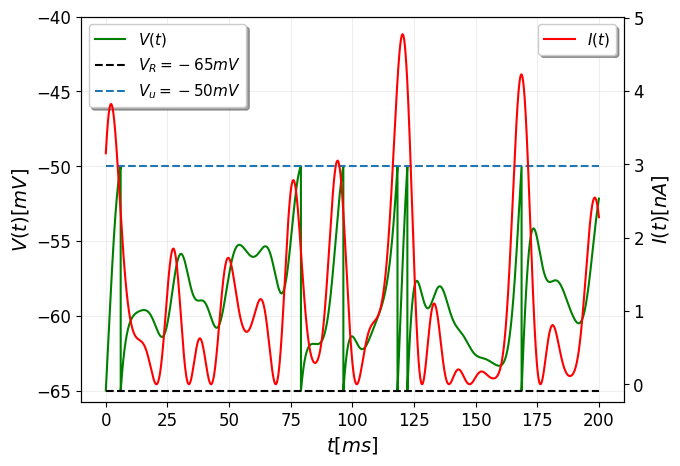

In [ ]:
# Intento de graficarla corriente y el voltaje en un mismo gráfico

# Definimos algunas constantes

E   = -65 #mV
Vo  = E  #mV
tau = 10  #ms
R   = 10
Io   = 0.35

# Resolvemos la ecuación diferencial

k = 10000 #número de pasos
p = 1
t = np.linspace(0,200,k) #ms

def f(Y,t):
    E   = -65 #mV
    Vo  = E   #mV
    tau = 10  #ms
    R   = 10
    Io   = 0.35
    # Sistema de ecuaciones diferenciales, dos ecuaciones de orden uno.
    resultado = np.array([(1/tau)*(E-Y[0]+Io*R*(np.cos(Y[1]/3)+np.sin(Y[1]/5)+np.cos(Y[1]/7)+np.sin(Y[1]/11)+np.cos(Y[1]/13))**2),1])
    return(resultado)

a   = t[0]               # Tiempo inicial
b   = t[-1]              # Tiempo final
h   = (t[-1]-t[0])/k     # Tamaño del paso
p   = 1                  # Constante que acompaña a la función
x_0 = [E,0]              # Condición inicial en Tiempo inicial

# Integramos numéricamente el sistema de ecuaciones.

V_u = -50 #Pot. umbral
y_fin,t_fin = ode.integrador_ode_IandF(f,x_0,E,V_u,t[0],t[-1],k,p)

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.plot(t_fin,y_fin[:,0],c='g',label=r'$V(t)$')
ax.set_xlabel(r'$t[ms]$',fontsize=14)
ax.set_ylabel(r'$V(t)[mV]$',fontsize=14)
# ax.set_title(r'$Voltaje\ vs\ Tiempo$')
ax.hlines(E,t[0],t[-1],linestyles='--',colors='k',label = r'$V_{R} = '+str(E)+'mV$')
ax.hlines(V_u,t[0],t[-1],linestyles='--',label = r'$ V_{u}= '+str(V_u)+'mV$')
# ax.legend(framealpha=0.5, shadow=True)
ax.grid(alpha=0.2)
ax.set_ylim(top=-40)


# twin object for two different y-axis on the sample plot

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(t_fin, Io*(np.cos(t_fin/3)+np.sin(t_fin/5)+np.cos(t_fin/7)+np.sin(t_fin/11)+np.cos(t_fin/13))**2,color='r',label=r'$I(t)$')
ax2.set_ylabel(r"$I(t)[nA]$",fontsize=14)


# # Graficamos la corriente de entrada
# ax[1].plot(t, Io*(np.cos(t/3)+np.sin(t/5)+np.cos(t/7)+np.sin(t/11)+np.cos(t/13))**2,c='r', label=r'$Sol.\ analítica\ de: (V_{0}-E-IR)e^{-t /\\tau}+E+IR$')
# # ax[1].scatter(t_fin,y_fin[:,0],s=1.9,c='g',label='$Numérica$')
# ax[1].set_xlabel(r'$t[ms]$')
# ax[1].set_ylabel(r'$I(t)[nA]$')
# ax[1].set_title(r'$Corriente\ vs\ Tiempo$')
# # ax[1].hlines(E,t[0],t[-1],linestyles='--',colors='r',label = 'Pot. en reposo= '+str(E))
# # ax[1].hlines(V_u,t[0],t[-1],linestyles='--',label = 'Pot. en umbral $V_{u}$= '+str(V_u))
# # ax[1].legend(framealpha=0.5, shadow=True)
# ax[1].grid(alpha=0.2)

ax.tick_params(axis='both',labelsize  = 12)
ax.legend(framealpha=1, shadow=True,loc = 'upper left',fontsize = 11,ncols =1)
ax2.tick_params(axis='y',labelsize  = 12)
ax2.legend(framealpha=1, shadow=True,loc = 'upper right',fontsize = 11,ncols =1)



# plt.savefig("Punto_I.pdf")
plt.show()